In [1]:
from pyctp import saftvrqmie
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('talk')
sns.set_palette('Dark2')
sns.set_style('ticks')

In [2]:
colors = ["k", "r", "b", "brown", "g", "purple"]

# Testing effect of reference model for D2-Ne

In [51]:
# Instanciate and init SAFT-VRQ Mie object (Aasen 2020: https://doi.org/10.1063/1.5136079)# Instanciate and init SAFT-VRQ Mie object with additive reference, also including non-additivity correction (Leonard 1970: https://doi.org/10/c66c3g)
qSAFT = saftvrqmie.saftvrqmie()
qSAFT.init("D2,Ne")
qSAFT.set_tmin(temp=2.0)
# Instanciate and init SAFT-VRQ Mie object with additive reference
qSAFT_ADD = saftvrqmie.saftvrqmie()
qSAFT_ADD.init("D2,Ne")
qSAFT_ADD.set_hard_sphere_reference("ADDITIVE",exact_binary_dhs=True, enable_hs_extra=False)
# Instanciate and init SAFT-VRQ Mie object with additive reference, also including non-additivity correction (Leonard 1970: https://doi.org/10/c66c3g)
qSAFT_ADD_EXTRA = saftvrqmie.saftvrqmie()
qSAFT_ADD_EXTRA.init("D2,Ne")
qSAFT_ADD_EXTRA.set_hard_sphere_reference("ADDITIVE",exact_binary_dhs=True, enable_hs_extra=True)
qSAFT_ADD_EXTRA_fit = saftvrqmie.saftvrqmie()
qSAFT_ADD_EXTRA_fit.init("D2,Ne")
# Instanciate and init SAFT-VRQ Mie object with additive reference, also including non-additivity correction (Leonard 1970: https://doi.org/10/c66c3g). Use new parameters for deuterium, and retuned interaction parameter.
qSAFT_ADD_EXTRA_fit.set_hard_sphere_reference("ADDITIVE",exact_binary_dhs=True, enable_hs_extra=True)
qSAFT_ADD_EXTRA_fit.set_pure_fluid_param(1, 1.0, 3.00874e-10, 3.92388e+01, 7.0, 11.0)
qSAFT_ADD_EXTRA_fit.redefine_critical_parameters()
qSAFT_ADD_EXTRA_fit.set_eps_kij(1, 2, 0.12) #0.13

In [36]:
Temperatures = [24.60, 31.86, 34.47]

In [37]:
def plot_pxy(isot, **KWARGS):
    # Pxy phase envelope
    p_scaling = 1.0e-6
    LLE, L1VE, L2VE, T = isot
    if LLE[0] is not None:
        plt.plot(LLE[0], LLE[2]*p_scaling, **KWARGS)
        plt.plot(LLE[1], LLE[2]*p_scaling, **KWARGS)
    if L1VE[0] is not None:
        plt.plot(L1VE[0], L1VE[2]*p_scaling, **KWARGS)
        plt.plot(L1VE[1], L1VE[2]*p_scaling, **KWARGS)
    if L2VE[0] is not None:
        plt.plot(L2VE[0], L2VE[2]*p_scaling, **KWARGS)
        plt.plot(L2VE[1], L2VE[2]*p_scaling, **KWARGS)

In [38]:
def plot_prho(eos, isot, **KWARGS):
    # Pxy phase envelope
    p_scaling = 1.0e-6
    rho_scaling = 1.0e-3
    LLE, L1VE, L2VE, T = isot
    if LLE[0] is not None:
        v0 = np.zeros_like(LLE[2])
        v1 = np.zeros_like(LLE[2])
        for i in range(np.shape((LLE[2]))[0]):
            v0[i], = eos.specific_volume(T, LLE[2][i], [LLE[0][i], 1.0-LLE[0][i]], eos.LIQPH)
            v1[i], = eos.specific_volume(T, LLE[2][i], [LLE[1][i], 1.0-LLE[1][i]], eos.LIQPH)
        plt.plot(rho_scaling/v0, LLE[2]*p_scaling, **KWARGS)
        plt.plot(rho_scaling/v1, LLE[2]*p_scaling, **KWARGS)
    if L1VE[0] is not None:
        v0 = np.zeros_like(L1VE[2])
        v1 = np.zeros_like(L1VE[2])
        for i in range(np.shape(L1VE[2])[0]):
            v0[i], = eos.specific_volume(T, L1VE[2][i], [L1VE[0][i], 1.0-L1VE[0][i]], eos.LIQPH)
            v1[i], = eos.specific_volume(T, L1VE[2][i], [L1VE[1][i], 1.0-L1VE[1][i]], eos.VAPPH)
        plt.plot(rho_scaling/v0, L1VE[2]*p_scaling, **KWARGS)
        plt.plot(rho_scaling/v1, L1VE[2]*p_scaling, **KWARGS)
        if LLE[0] is not None:
            KWARGS_MOD = {}
            for key, value in KWARGS.items():
                 KWARGS_MOD[key] = value
            KWARGS_MOD["linestyle"] = ":"
            plt.plot([rho_scaling/v1[0], rho_scaling/v0[0]], [L1VE[2][0]*p_scaling]*2, **KWARGS_MOD)
    if L2VE[0] is not None:
        v0 = np.zeros_like(L2VE[2])
        v1 = np.zeros_like(L2VE[2])
        for i in range(np.shape(L2VE[2])[0]):
            v0[i], = eos.specific_volume(T, L2VE[2][i], [L2VE[0][i], 1.0-L2VE[0][i]], eos.LIQPH)
            v1[i], = eos.specific_volume(T, L2VE[2][i], [L2VE[0][i], 1.0-L2VE[0][i]], eos.VAPPH)
        plt.plot(rho_scaling/v0, L2VE[2]*p_scaling, **KWARGS)
        plt.plot(rho_scaling/v1, L2VE[2]*p_scaling, **KWARGS)

In [39]:
def plot_isotherms_pxy(isot, linestyle="-"):
    for iT, iso in enumerate(isot):
        plot_pxy(iso, color=colors[iT], linestyle=linestyle)

In [40]:
def plot_isotherms_prho(eos, isot, linestyle="-"):
    for iT, iso in enumerate(isot):
        plot_prho(eos, iso, color=colors[iT], linestyle=linestyle)

In [41]:
def get_isotherms(eos):
    isotherms = []
    for T in Temperatures:
        LLE, L1VE, L2VE = eos.get_binary_pxy(T)
        isotherms.append([LLE, L1VE, L2VE, T])
    return isotherms

In [42]:
qSAFT_isot = get_isotherms(eos=qSAFT)
#qSAFT_ADD_isot = get_isotherms(eos=qSAFT_ADD)
qSAFT_ADD_EXTRA_isot = get_isotherms(eos=qSAFT_ADD_EXTRA)

In [52]:
qSAFT_ADD_EXTRA_fit_isot = get_isotherms(eos=qSAFT_ADD_EXTRA_fit)

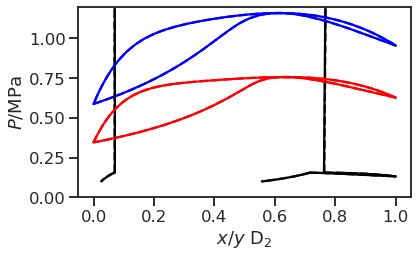

In [43]:
plot_isotherms_pxy(isot=qSAFT_isot, linestyle="-")
#plot_isotherms_pxy(isot=qSAFT_ADD_isot, linestyle=":")
plot_isotherms_pxy(isot=qSAFT_ADD_EXTRA_isot, linestyle="--")
plt.ylim([0,1.2])
plt.ylabel(r"$P$/MPa")
plt.xlabel(r"$x/y$ D$_2$")
plt.tight_layout()
plt.savefig("d2_ne_pxy.pdf")
plt.show()

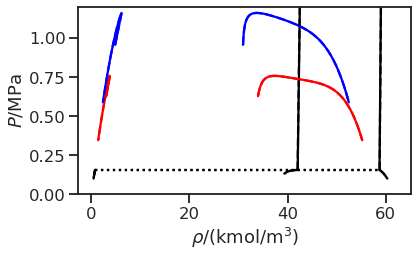

In [44]:
plot_isotherms_prho(eos=qSAFT, isot=qSAFT_isot, linestyle="-")
#plot_isotherms_prho(eos=qSAFT_ADD, isot=qSAFT_ADD_isot, linestyle=":")
plot_isotherms_prho(eos=qSAFT_ADD_EXTRA, isot=qSAFT_ADD_EXTRA_isot, linestyle="--")
plt.ylim([0,1.2])
plt.ylabel(r"$P$/MPa")
plt.xlabel(r"$\rho$/(kmol/m$^3$)")
plt.tight_layout()
plt.savefig("d2_ne_p_rho.pdf")
plt.show()

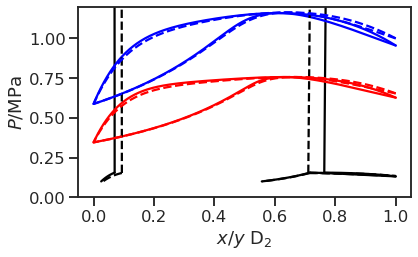

In [53]:
plot_isotherms_pxy(isot=qSAFT_ADD_EXTRA_isot, linestyle="-")
plot_isotherms_pxy(isot=qSAFT_ADD_EXTRA_fit_isot, linestyle="--")
plt.ylim([0,1.2])
plt.ylabel(r"$P$/MPa")
plt.xlabel(r"$x/y$ D$_2$")
plt.tight_layout()
plt.savefig("d2_ne_pxy_fit.pdf")
plt.show()

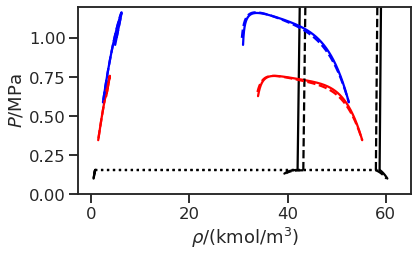

In [54]:
plot_isotherms_prho(eos=qSAFT_ADD_EXTRA, isot=qSAFT_ADD_EXTRA_isot, linestyle="-")
plot_isotherms_prho(eos=qSAFT_ADD_EXTRA_fit, isot=qSAFT_ADD_EXTRA_fit_isot, linestyle="--")
plt.ylim([0,1.2])
plt.ylabel(r"$P$/MPa")
plt.xlabel(r"$\rho$/(kmol/m$^3$)")
plt.tight_layout()
plt.savefig("d2_ne_p_rho_fit.pdf")
plt.show()